# ДЗ 3
Обучение с учителем

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as skl
import sklearn.metrics as metrics
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble
import sklearn.preprocessing as pproc
import sklearn.model_selection
import sklearn.datasets

import sys
sys.path.append(r"..")

import tools

## Задание 1
    Импортируйте библиотеки pandas и numpy.
    Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn..
    Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью
    функции train_test_split так, чтобы размер тестовой выборки
    составлял 30% от всех данных, при этом аргумент random state должен быть равен 42.
    Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля
    sklearn.linear_model.
    Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на
    тестовых.

Библиотека sklearn более не содержит датасета "Boston House Prices dataset". Загрузка из файлв csv.

In [2]:
df = pd.read_csv("boston_house_prices.csv", header=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

In [3]:
df.columns = df.columns.str.lower()

Сокращение занимаемой памяти:

In [4]:
tools.reduceMem(df)

Memory usage of dataframe is 0.05 MB
Memory usage after optimization is: 0.02 MB
Decreased by 56.5%


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67,22.400000
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,20.600000
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,23.900000
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48,22.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   crim     506 non-null    float32 
 1   zn       506 non-null    float32 
 2   indus    506 non-null    float32 
 3   chas     506 non-null    category
 4   nox      506 non-null    float32 
 5   rm       506 non-null    float32 
 6   age      506 non-null    float32 
 7   dis      506 non-null    float32 
 8   rad      506 non-null    category
 9   tax      506 non-null    int16   
 10  ptratio  506 non-null    float32 
 11  b        506 non-null    float32 
 12  lstat    506 non-null    float32 
 13  medv     506 non-null    float32 
dtypes: category(2), float32(11), int16(1)
memory usage: 24.1 KB


Разбиение на выборки:

In [6]:
xTrain, xTest, yTrain, yTest = skl.model_selection.train_test_split(
    df.iloc[:, :-1],
    df.medv,
    test_size=0.3,
    shuffle=True,
    random_state=42
)

In [7]:
lr = skl.linear_model.LinearRegression()

In [8]:
lr.fit(xTrain, yTrain)

LinearRegression()

In [9]:
yPred = lr.predict(xTest)

R2:	0.711
RMSE:	4.639
MSE:	21.517


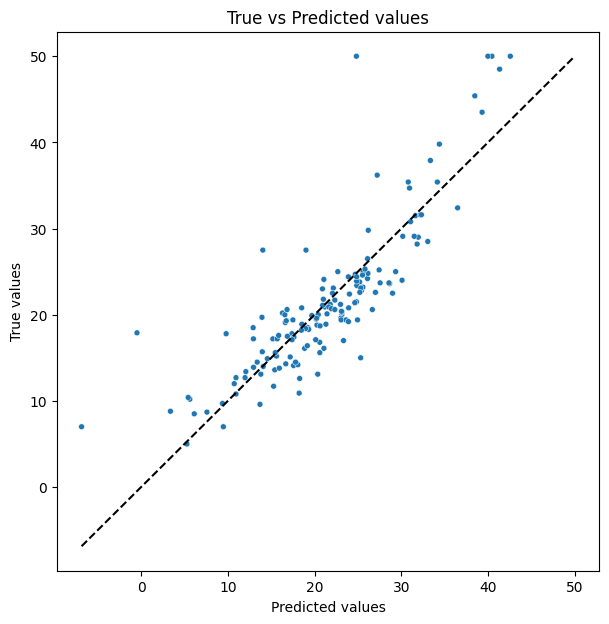

In [10]:
tools.evaluatePreds(yTest, yPred)

## Задание 2
    Создайте модель под названием model с помощью класса RandomForestRegressor из модуля
    sklearn.ensemble.
    Сделайте агрумент n_estimators равным 1000,
    max_depth должен быть равен 12 и random_state сделайте равным 42.
    Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
    но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
    чтобы получить из датафрейма одномерный массив Numpy,
    так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно
    применение массивов вместо датафрейма.
    Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из
    предыдущего задания.
    Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [11]:
model = skl.ensemble.RandomForestRegressor(
    criterion='squared_error',
    n_estimators=1000,
    max_depth=12,
    random_state=42
)

In [12]:
model.fit(xTrain, yTrain.values)

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

R2:	0.877
RMSE:	3.023
MSE:	9.139


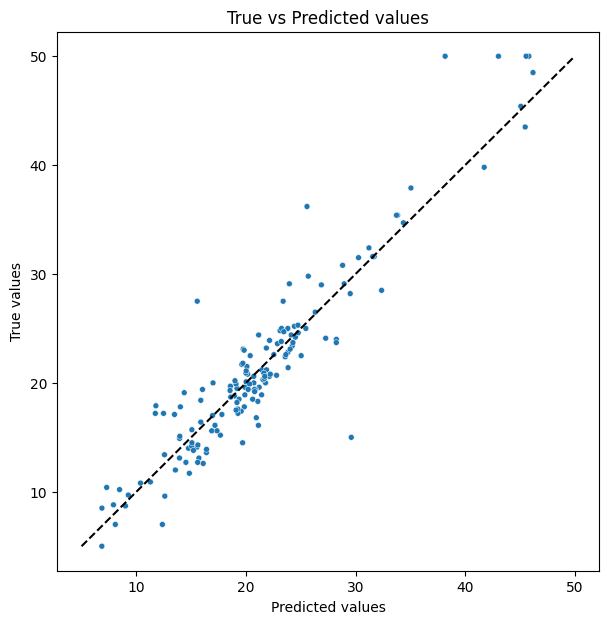

In [13]:
yPred = model.predict(xTest)
tools.evaluatePreds(yTest, yPred)

2-я модель работает лучше, показатель R2 выше, а ошибки меньше.

## *Задание 3
    Вызовите документацию для класса RandomForestRegressor,
    найдите информацию об атрибуте feature_importances_.
    С помощью этого атрибута найдите сумму всех показателей важности,
    установите, какие два признака показывают наибольшую важность.

In [14]:
skl.ensemble.RandomForestRegressor?

Init signature:
skl.ensemble.RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of decision tree
regressors on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole d

In [15]:
pd.Series(model.feature_importances_, index=model.feature_names_in_).nlargest(2)

lstat    0.415785
rm       0.403072
dtype: float64

## *Задание 4
    В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию
    по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать
    задачу классификации - будем определять,какие из транзакции по кредитной карте являются
    мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества
    относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать
    лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.
    
    Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
    Загрузите датасет creditcard.csv и создайте датафрейм df.


In [16]:
df = pd.read_csv(r"..\hw2\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [17]:
tools.reduceMem(df)

Memory usage of dataframe is 67.36 MB
Memory usage after optimization is: 32.87 MB
Decreased by 51.2%


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786,-11.881118,10.071785,-9.834784,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.770000,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.790001,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.879997,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.000000,0


    С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка
    несбалансирована. Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет
    ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы
    датафрейма:
    pd.options.display.max_columns = 100.
    Просмотрите первые 10 строк датафрейма df.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   Time    284807 non-null  int32   
 1   V1      284807 non-null  float32 
 2   V2      284807 non-null  float32 
 3   V3      284807 non-null  float32 
 4   V4      284807 non-null  float32 
 5   V5      284807 non-null  float32 
 6   V6      284807 non-null  float32 
 7   V7      284807 non-null  float32 
 8   V8      284807 non-null  float32 
 9   V9      284807 non-null  float32 
 10  V10     284807 non-null  float32 
 11  V11     284807 non-null  float32 
 12  V12     284807 non-null  float32 
 13  V13     284807 non-null  float32 
 14  V14     284807 non-null  float32 
 15  V15     284807 non-null  float32 
 16  V16     284807 non-null  float32 
 17  V17     284807 non-null  float32 
 18  V18     284807 non-null  float32 
 19  V19     284807 non-null  float32 
 20  V20     284807 non-null  f

Целевой показатель Class несбалансирован:

In [19]:
df.Class.value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

Пропуски отсустствуют:

In [20]:
df.columns[df.isna().sum() > 0]

Index([], dtype='object')

Имеются нулевые значения:

In [21]:
df[df == 0].count()[df[df == 0].count() > 0]

Time           2
Amount      1825
Class     284315
dtype: int64

In [22]:
pd.options.display.max_columns = 100

In [23]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.670000,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.990000,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686132,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.799999,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.199997,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.680000,0


    Создайте датафрейм X из датафрейма df, исключив столбец Class.
    Создайте объект Series под названием y из столбца Class.
    Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split,
    используя аргументы: test_size=0.3, random_state=100, stratify=y.
    У вас должны получиться объекты X_train, X_test, y_train и y_test.
    Просмотрите информацию о их форме.

In [24]:
X = df.drop('Class', axis=1)
y = df.Class

In [25]:
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(
    X, y,
    test_size=0.3,
    shuffle=True,
    random_state=42
)
for df_ in X_train, X_test, y_train, y_test:
    print(df_.shape)

(199364, 30)
(85443, 30)
(199364,)
(85443,)


    Для поиска по сетке параметров задайте такие параметры:
    parameters = [{'n_estimators': [10, 15],
    'max_features': np.arange(3, 5),
    'max_depth': np.arange(4, 7)}]
    Создайте модель GridSearchCV со следующими аргументами:
    estimator=RandomForestClassifier(random_state=100),
    param_grid=parameters,
    scoring='roc_auc',
    cv=3.
    Обучите модель на тренировочном наборе данных (может занять несколько минут).

In [26]:
parameters = [{
    'n_estimators': [10, 15],
    'max_features': np.arange(3, 5),
    'max_depth': np.arange(4, 7)
}]

In [27]:
gsCV = skl.model_selection.GridSearchCV(
    param_grid=parameters,
    estimator=skl.ensemble.RandomForestClassifier(random_state=100),
    scoring='roc_auc',
    cv=3
)

In [28]:
gsCV.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

    Просмотрите параметры лучшей модели с помощью атрибута best_params_.
    Предскажите вероятности классов с помощью полученной модели и метода predict_proba.
    Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и
    запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
    Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных,
    используя в качестве аргументов массивы y_test и y_pred_proba.

In [29]:
gsCV.best_params_

{'max_depth': 6, 'max_features': 4, 'n_estimators': 15}

In [54]:
y_pred_proba = gsCV.best_estimator_.predict_proba(X_test)[:, 1]

Результат по метрике roc_auc_score на тестовой выборке:

In [31]:
metrics.roc_auc_score(y_test, y_pred_proba)

0.9693852273346302

Результат на тренировочной выборке:

In [32]:
metrics.roc_auc_score(y_train, gsCV.best_estimator_.predict_proba(X_train)[:, 1])

0.9628677481883173

## *Дополнительные задания:

### 1)
    Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в
    переменную data.

In [36]:
wine = skl.datasets.load_wine()

### 2)
    Полученный датасет не является датафреймом. Это структура данных, имеющая ключи
    аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys,
    содержащий ее ключи.

In [37]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

### 3)
    Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде
    привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими
    переносами и т.д.

In [38]:
wine.data.shape[1], len(wine.feature_names)

(13, 13)

In [39]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [40]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

### 4)
    Сколько классов содержит целевая переменная датасета? Выведите названия классов.

In [41]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### 5)
    На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков
    создайте датафрейм под названием X.

In [42]:
X = pd.DataFrame(wine.data, columns=wine.feature_names)

### 6)
    Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

In [43]:
X.shape[0]

178

In [44]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Пропущенные значения отсутствуют.

### 7)
    Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64.
    Название поля - 'target'.

In [45]:
X['target'] = wine.target.astype(np.int64)

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

### 8)
    Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название
    X_corr.

In [47]:
X_corr = X.corr()

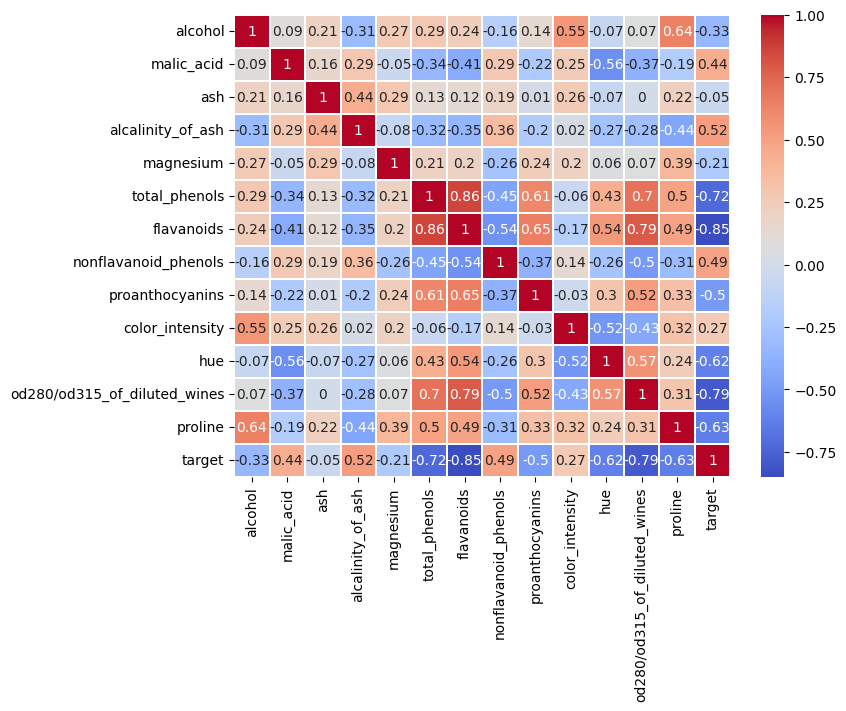

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    X_corr.round(2),
    annot=True,
    linewidths=0.1,
    cmap="coolwarm"
)
plt.show()

### 9)
    Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному
    значению превышает 0.5 (причем, само поле target не должно входить в этот список).

In [49]:
high_corr = [
    col
    for col in X_corr.columns.drop('target')
    if abs(X_corr.loc['target', col]) > 0.5
]
high_corr

['alcalinity_of_ash',
 'total_phenols',
 'flavanoids',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### 10)
    Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых
    содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X
    соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака.
    Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с
    признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с
    помощью метода describe.

In [50]:
X.drop('target', axis=1, inplace=True)

In [51]:
X = pd.concat(
    (X, (X[high_corr]**2).rename(columns=lambda c: c + "_2")),
    axis=1
)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,243.36,7.8400,9.3636,1.0816,15.3664,1134225.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,125.44,7.0225,7.6176,1.1025,11.5600,1102500.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,345.96,7.8400,10.4976,1.0609,10.0489,1404225.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,282.24,14.8225,12.1801,0.7396,11.9025,2190400.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,441.00,7.8400,7.2361,1.0816,8.5849,540225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,420.25,2.8224,0.3721,0.4096,3.0276,547600.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,529.00,3.2400,0.5625,0.4900,2.4336,562500.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,400.00,2.5281,0.4761,0.3481,2.4336,697225.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,400.00,2.7225,0.4624,0.3600,2.6244,705600.0


In [52]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,391.142865,5.657030,5.110049,0.968661,7.322155,6.564591e+05
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,133.671775,2.936294,4.211441,0.443798,3.584316,5.558591e+05
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,112.360000,0.960400,0.115600,0.230400,1.612900,7.728400e+04
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,295.840000,3.036325,1.452100,0.612325,3.754075,2.505010e+05
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,380.250000,5.546050,4.558250,0.931250,7.728400,4.536045e+05
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,462.250000,7.840000,8.265700,1.254400,10.048900,9.702250e+05
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,900.000000,15.054400,25.806400,2.924100,16.000000,2.822400e+06
